# Imports

In [1]:
# Data Analysis and Visualisation
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.ticker import MultipleLocator
import numpy as np


# Molecular Dynamics specific libraries
from ase.io import read, write, Trajectory
from ase.visualize import view
from ase.build.rotate import minimize_rotation_and_translation
from ase.build import molecule

# Movie of trajectory
import nglview as nv

# MDAnalysis for Universe - remove waters

import MDAnalysis as mda

In [2]:
plt.rcdefaults()

In [3]:
plt.rcParams.update({
    #'axes.titleweight': 'bold',        
    'axes.titlesize': 14,              
    'axes.labelsize': 12,              
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,             
    'legend.fontsize': 12,            
    'figure.titlesize': 16,            
})

plt.rcParams["axes.prop_cycle"] = plt.cycler(color=["#1f77b4", "#ff5733", "#2ca02c"])  # Custom colors

- MACE needed for force analysis, maybe others too...

In [ ]:
from mace.calculators import mace_mp

- Set up ASE calculator

In [ ]:
macemp = mace_mp() # return ASE calculator

- Radius of gyration function

In [2]:
def radius_of_gyration(atoms):
    
    # Getting atomic position for all atoms
    positions = atoms.get_positions() 
    
    center_of_mass = atoms.get_center_of_mass()
    
    # Formula for Radius of Gyration
    rg = np.sqrt(np.mean(np.sum((positions - center_of_mass) ** 2, axis=1)))
    
    return rg

## Protein in vacuum 

In [ ]:
protein_vacuum = read("/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/setup_scripts/explicit_solvent/trp_cage/2jof_trp_cage_last_conform.pdb")

In [6]:
radius_of_gyration(protein_vacuum)

7.239881786377119

In [7]:
len(protein_vacuum)

284

In [ ]:
protein_vacuum.center()

In [ ]:
print(min(protein_vacuum.get_positions()[:,0]))
print(max(protein_vacuum.get_positions()[:,0]))

print(min(protein_vacuum.get_positions()[:,1]))
print(max(protein_vacuum.get_positions()[:,1]))

print(min(protein_vacuum.get_positions()[:,2]))
print(max(protein_vacuum.get_positions()[:,2]))



-8.720500000000001
8.720500000000001
-9.526
9.526
-7.0255
7.0255


In [ ]:
protein_vacuum.set_cell([35,35,35])

In [ ]:
protein_vacuum.set_pbc(True)

In [ ]:
protein_vacuum.center()

In [ ]:
protein_vacuum

Atoms(symbols='C92H136N26O30', pbc=True, cell=[35.0, 35.0, 35.0], atomtypes=..., bfactor=..., occupancy=..., residuenames=..., residuenumbers=...)

In [ ]:
view(protein_vacuum, viewer='x3d')

In [ ]:
write('/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/setup_scripts/vacuum_neutralized/vacuum_trp_cage.xyz', protein_vacuum)

In [ ]:
check = read('/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/setup_scripts/vacuum_neutralized/vacuum_trp_cage.xyz')

In [ ]:
check

Atoms(symbols='C92H136N26O30', pbc=True, cell=[35.0, 35.0, 35.0], atomtypes=..., bfactor=..., occupancy=..., residuenames=..., residuenumbers=...)

In [ ]:
view(check, viewer='x3d')


In [ ]:
vacuum_universe = mda.Universe('/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/setup_scripts/vacuum_neutralized/vacuum_trp_cage.xyz')

In [ ]:
vacuum_universe

<Universe with 284 atoms>

In [ ]:
vacuum_universe.residues

<ResidueGroup with 1 residue>

- Average starting Rg for standard and retro Trp-cage

In [ ]:
regular_trp_cage_conforms = read("/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/setup_scripts/explicit_solvent/trp_cage/2jof_trp_cage.pdb", index = ":")

In [4]:
regular_trp_cage_conforms_list = regular_trp_cage_conforms[:-1]

In [5]:
conforms_rg_list = []
for conform in regular_trp_cage_conforms_list:
    conforms_rg_list.append(radius_of_gyration(conform))

mean_regular_trp_cage_experimental_rg = np.mean(conforms_rg_list)

min_regular_trp_cage_experimental_rg = min(conforms_rg_list)

max_regular_trp_cage_experimental_rg = max(conforms_rg_list)


In [ ]:
retro_trp_cage_conforms = read("/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/setup_scripts/explicit_solvent/trp_cage/2luf.pdb", index = ":")

In [7]:
retro_trp_cage_conforms_list = retro_trp_cage_conforms[:-1]

In [8]:
conforms_retro_rg_list = []
for conform in retro_trp_cage_conforms_list:
    conforms_retro_rg_list.append(radius_of_gyration(conform))


mean_retro_trp_cage_experimental_rg = np.mean(conforms_retro_rg_list)

min_retro_trp_cage_experimental_rg = min(conforms_retro_rg_list)

max_retro_trp_cage_experimental_rg = max(conforms_retro_rg_list)

- Retro Trp cage

In [ ]:
retro_trp_cage = read("/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/setup_scripts/explicit_solvent/trp_cage/2luf_trp_cage_retro_last_conform.pdb")

In [ ]:
view = nv.show_ase(retro_trp_cage, color = "red")

NGLWidget()

In [10]:
retro_trp_cage

Atoms(symbols='C98H150N27O29', pbc=False, atomtypes=..., bfactor=..., occupancy=..., residuenames=..., residuenumbers=...)

In [11]:
radius_of_gyration(retro_trp_cage)


7.287876930382901

In [32]:
retro_trp_cage.set_pbc(True)

In [33]:
retro_trp_cage

Atoms(symbols='C98H150N27O29', pbc=True, atomtypes=..., bfactor=..., occupancy=..., residuenames=..., residuenumbers=...)

In [34]:
len(retro_trp_cage)

304

In [35]:
retro_trp_cage.center()

In [36]:
print(min(retro_trp_cage.get_positions()[:,0]))
print(max(retro_trp_cage.get_positions()[:,0]))

print(min(retro_trp_cage.get_positions()[:,1]))
print(max(retro_trp_cage.get_positions()[:,1]))

print(min(retro_trp_cage.get_positions()[:,2]))
print(max(retro_trp_cage.get_positions()[:,2]))



-10.349
10.349
-8.352500000000001
8.352500000000001
-9.7455
9.7455


In [42]:
retro_trp_cage.set_cell([33,33,33])

In [39]:
retro_trp_cage.center()

In [43]:
retro_trp_cage

Atoms(symbols='C98H150N27O29', pbc=True, cell=[33.0, 33.0, 33.0], atomtypes=..., bfactor=..., occupancy=..., residuenames=..., residuenumbers=...)

In [44]:
view(retro_trp_cage, viewer='x3d')

In [ ]:
write('/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/setup_scripts/vacuum_neutralized/vacuum_retro_trp_cage.xyz', retro_trp_cage)

In [ ]:
check = read('/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/setup_scripts/vacuum_neutralized/vacuum_retro_trp_cage.xyz')

In [47]:
check

Atoms(symbols='C98H150N27O29', pbc=True, cell=[33.0, 33.0, 33.0], atomtypes=..., bfactor=..., occupancy=..., residuenames=..., residuenumbers=...)

In [48]:
len(check)

304

In [49]:
view(check, viewer='x3d')


## Visualize initial trajectory

    - Check no unphysical unfolding is occuring for the system at 300K

## Vacuum

In [ ]:
vacuum_traj = read("/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/analysis_scripts/trajectory_files/vacuum_nvt_production_1_simulation_300K_trp_cage_standard.traj", index = ":")

In [13]:
len(vacuum_traj)

2013

In [ ]:
#write("/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/analysis_scripts/trajectory_files/xyz_files/vacuum_nvt_production_1_simulation_300K_trp_cage_standard.xyz", vacuum_traj)

In [ ]:
vacuum_retro_traj = read("/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/analysis_scripts/trajectory_files/vacuum_nvt_production_1_simulation_300K_trp_cage_retro.traj", index = ":")

In [76]:
vacuum_retro_traj[0].set_cell([35,35,35])

vacuum_retro_traj[0].wrap()

vacuum_melt_retro_traj[-1].set_cell([35,35,35])

vacuum_melt_retro_traj[-1].wrap()

In [ ]:
write("/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/analysis_scripts/trajectory_files/final_standard_structure_from_498K_sim.pdb", vacuum_498_traj[-1])

In [ ]:
final_retro_structure_after_heating = read("/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/analysis_scripts/trajectory_files/final_standard_structure_from_498K_sim.pdb")

In [12]:
final_retro_structure_after_heating

Atoms(symbols='C92H136N26O30', pbc=True, cell=[35.0, 35.0, 35.0], atomtypes=..., bfactor=..., occupancy=..., residuenames=..., residuenumbers=...)

In [13]:
view = nv.show_ase(final_retro_structure_after_heating)

#view.add_representation("cartoon", selection="protein", color="spectrum")

view

NGLWidget()

In [74]:
len(vacuum_retro_traj)

2002

In [ ]:
vacuum_498_traj = read("/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/analysis_scripts/trajectory_files/vacuum_nvt_prod_1_simulation_498K_trp_cage_standard.traj", index = ":")

In [70]:
len(vacuum_498_traj)

4044

In [ ]:
write("/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/analysis_scripts/trajectory_files/xyz_files/vacuum_nvt_production_1_simulation_498K_trp_cage_standard.xyz", vacuum_498_traj)


- Ensure pbc are considered

In [16]:
# Wrapping needed for the 300k runs
for frame in vacuum_retro_traj:
    frame.wrap()

for frame in vacuum_traj:
    frame.wrap()

In [17]:
rg_list = []
for val in vacuum_traj:
    rg = radius_of_gyration(val)
    
    rg_list.append(rg)

In [18]:
rg_list_retro = []
for val in vacuum_retro_traj:
    rg = radius_of_gyration(val)
    
    rg_list_retro.append(rg)

### Mean values from simulation

    Regular: 6.846538254361015

    Retro: 6.937644862167288


### Number of conforms

    Regular: 28

    Retro: 10

In [27]:
print(np.mean(rg_list))
print(np.mean(rg_list_retro))

6.837420494734705
6.846768694932757


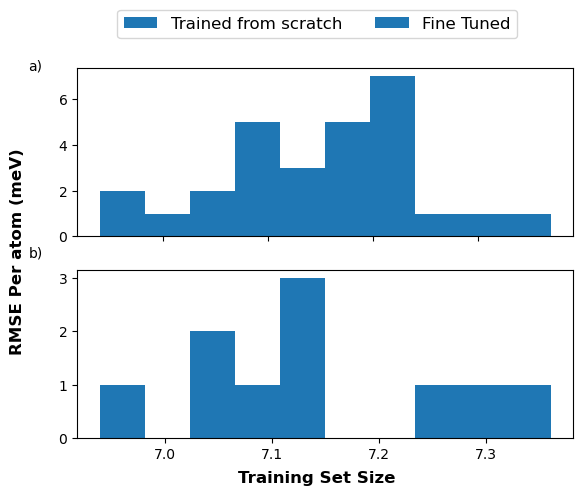

In [255]:
fig, ((ax1, ax2)) = plt.subplots(2, 1)

#plt.setp((ax1, ax2), xticks=[10, 20, 30])

#ax1.set_title('Energy Errors')
ax1.hist(conforms_rg_list, ec='black', bins=10)
#ax1.set_yticks([4,6,8,10,12,14, 16, 18])
#ax1.yaxis.set_minor_locator(ticker.MultipleLocator(1))
#ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

#ax2.set_title('Force Errors')
ax2.hist(conforms_retro_rg_list, ec='black', bins=10)
#ax2.set_yticks([100,140,180,220,260,300])
#ax2.yaxis.set_minor_locator(ticker.MultipleLocator(20))
#ax2.grid(True, which='both', linestyle='--', linewidth=0.5)

fig.supxlabel('Training Set Size', fontweight='bold')
fig.supylabel('RMSE Per atom (meV)', fontweight='bold')
fig.legend(labels=['Trained from scratch', 'Fine Tuned'], loc="upper center", bbox_to_anchor=(0.5, 1.02), ncol=2, fontsize=12)

fig.text(0.06, 0.90, 'a)', ha='center', va='top', fontsize=10)
fig.text(0.06, 0.51, 'b)', ha='center', va='top', fontsize=10)

for ax in fig.get_axes():
    ax.label_outer()

In [ ]:
import time

protein_view = nv.show_ase(protein_vacuum)

#protein_view

protein_view.render_image(factor=4, transparent=True)

time.sleep(2)  # Give it time to render

protein_view.download_image(filename="trp_cage_image_better_quality.png")
#nv.NGLWidget().download_image(filename="/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/plots_for_paper/trp_cage_image.png", factor=4, antialias=True, trim=False, transparent=False)

In [ ]:
protein_view

In [ ]:
def save_image(view):
    img = view.render_image()
    
    while not img.value:
        time.sleep(0.1)
    
    with open("/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/plots_for_paper/trp_cage_image.png", "wb") as f:
        f.write(img.value)


In [ ]:
save_image(protein_view)

In [61]:
print(min_regular_trp_cage_experimental_rg)
print(max_regular_trp_cage_experimental_rg)

7.120081977740279
7.334564657859063


In [62]:
print(min_retro_trp_cage_experimental_rg)
print(max_retro_trp_cage_experimental_rg)

6.938837231175228
7.360562761948067


In [ ]:
plt.rcParams.update({
    #'axes.titleweight': 'bold',        
    'axes.titlesize': 16,              
    'axes.labelsize': 14,              
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,             
    'legend.fontsize': 14,            
    'figure.titlesize': 18,            
})



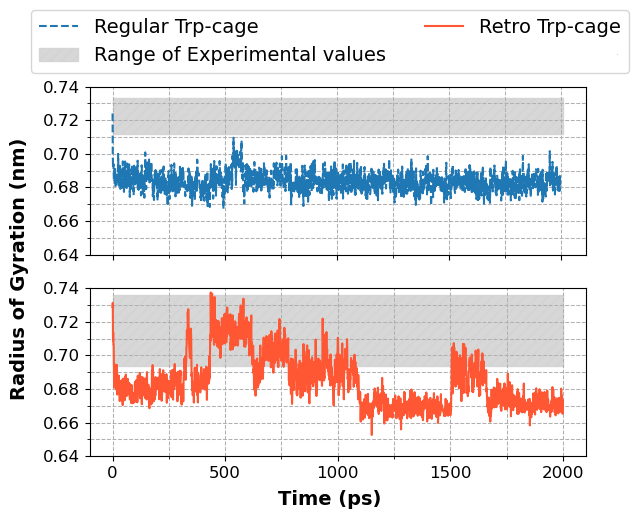

In [ ]:
fig, ((ax1, ax2)) = plt.subplots(2, 1)

# Set the ticks and ticklabels for all axes
#plt.setp((ax1, ax2), xticks=[10, 20, 30])

ax1.plot(np.array(rg_list[:-13])/10, linestyle="--")
ax1.set_xticks(list(range(0, 2001, 500)))
ax1.set_yticks([0.64,0.66,0.68,0.7,0.72,0.74])
ax1.yaxis.set_minor_locator(MultipleLocator(0.01))
ax1.grid(True, which='both', linestyle='--', linewidth=0.75)
ax1.xaxis.set_minor_locator(MultipleLocator(250))
#ax1.axhline(y=mean_regular_trp_cage_experimental_rg, color = "black", linestyle='-.', alpha = 0.4)
ax1.fill_between(np.linspace(0, len(rg_list)), min_regular_trp_cage_experimental_rg/10, max_regular_trp_cage_experimental_rg/10, color='lightgray', alpha=0.9, label="Min-Max Range", hatch="///")
ax1.set_ylim(top = 0.74, bottom = 0.64)

ax2.plot(np.array(rg_list_retro[:-2])/10, color = '#ff5733')
ax2.set_xticks(list(range(0, 2001, 500)))
ax2.set_yticks([0.64,0.66,0.68,0.7,0.72,0.74])
ax2.yaxis.set_minor_locator(MultipleLocator(0.01))
ax2.xaxis.set_minor_locator(MultipleLocator(10))
ax2.grid(True, which='both', linestyle="--", linewidth=0.75)
ax2.xaxis.set_minor_locator(MultipleLocator(250))
#ax2.axhline(y=mean_retro_trp_cage_experimental_rg, color = "black", linestyle='-.', alpha = 0.5)
ax2.fill_between(np.linspace(0, len(rg_list_retro)), min_retro_trp_cage_experimental_rg/10, max_retro_trp_cage_experimental_rg/10, color='lightgray', alpha=0.9, label="Min-Max Range", hatch="///")
ax2.set_ylim(top = 0.74, bottom = 0.64)

fig.supxlabel('Time (ps)', fontweight='bold', y = 0, fontsize = 14)
fig.supylabel('Radius of Gyration (nm)', fontweight='bold', x = 0, fontsize = 14)
fig.legend(labels=['Regular Trp-cage', "Range of Experimental values", 'Retro Trp-cage'], loc="upper center", bbox_to_anchor=(0.5, 1.06), ncol=2, fontsize=14)

# fig.text(0.07, 0.95, 'a)', ha='center', va='top', fontsize=9, fontweight='bold')
# fig.text(0.07, 0.50, 'b)', ha='center', va='top', fontsize=9, fontweight='bold')
fig.text(0.95, 0.95, 'a)', ha='center', va='top', fontsize=0, fontweight='bold')

for ax in fig.get_axes():
    ax.label_outer()
    
plt.savefig('/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/plots_for_paper/regular_and_retro_proteins_vacuum_300k.png', dpi=300, bbox_inches='tight')


- Minimum energies

In [35]:
import pandas as pd

In [ ]:
standard_trp_cage_300k =  pd.read_fwf('/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/analysis_scripts/energy_files/vacuum_nvt_production_1_md_log_300K_trp_cage_standard.txt')

retro_trp_cage_300k =  pd.read_fwf('/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/analysis_scripts/energy_files/vacuum_nvt_production_1_md_log_300K_trp_cage_retro.txt')

In [58]:
standard_trp_cage_300k.head()

Time[ps]  Etot/N[eV]  Epot/N[eV]  Ekin/N[eV]   T[K]  \
0       0.0     -6.1702     -6.2074      0.0373  288.3   
1       1.0     -6.1587     -6.1976      0.0389  300.7   
2       2.0     -6.1602     -6.1981      0.0379  293.2   
3       3.0     -6.1573     -6.1968      0.0396  306.0   
4       4.0     -6.1624     -6.2007      0.0383  296.1   

  ---------------------- stress [GPa] -----------------------  
0  -0.146     -0.116     -0.114  -0.001      0.007      0.022  
1   0.014     -0.068     -0.005   0.026     -0.015     -0.009  
2   0.074     -0.039     -0.032  -0.019      0.025      0.005  
3  -0.057      0.010      0.045  -0.004     -0.058     -0.000  
4  -0.027     -0.047     -0.009   0.008     -0.005      0.022

In [49]:
standard_trp_cage_300k['Etot/N[eV]'].min()

-6.1813

In [39]:
retro_trp_cage_300k['Etot/N[eV]'].min()

-6.1293

In [ ]:
from scipy.integrate import simpson

In [ ]:
k_B = 1.380649e-23 
T = 300  

boltzmann_factors_regular = np.exp(-standard_trp_cage_300k['Etot/N[eV]'] / (k_B * T))

# Estimate partition function using simpsons rule for numerical integration
Z_regular = simpson(boltzmann_factors_regular, standard_trp_cage_300k['Etot/N[eV]'])  

A_regular = -k_B * T * np.log(Z_regular)

print(A_regular)


**Make sure to correctly and reliably identify the hydronium/hydroxide ions in each frame!!!** 

    - Look at the 'most extreme' method looked at above...

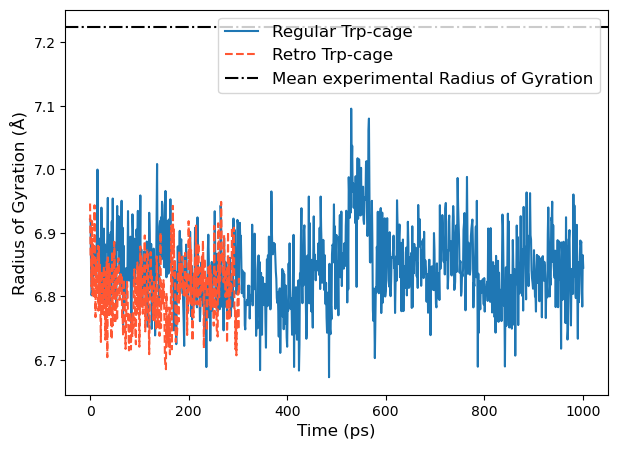

In [167]:
# Plot with different line styles
plt.figure(figsize=(7,5))
plt.plot(rg_list[10:], label="Regular Trp-cage")
plt.plot(rg_list_retro[10:], label="Retro Trp-cage", linestyle="--")

plt.axhline(y = 7.22392897542163, label = "Mean experimental Radius of Gyration", linestyle="-.", color = "black")
plt.xlabel("Time (ps)")
plt.ylabel("Radius of Gyration (Å)")
plt.title("")
plt.legend()
plt.show()

In [154]:
view(vacuum_retro_traj[-1], viewer = 'x3d')

In [ ]:
slower_heat = read("/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/analysis_scripts/trajectory_files/slower_heat_vacuum/vacuum_slower_heating_nvt_prod_1_simulation_498K_trp_cage_standard.traj", index = ":")

- Make sure periodic boundary conditions are considered properly

In [52]:
# Wrapping makes like no unfolding is happening here?
for frame in slower_heat:
    frame.wrap()

In [ ]:
view(vacuum_498_traj[4000])

In [53]:
rg_list_heat = []
for val in slower_heat:
    rg = radius_of_gyration(val)
    
    rg_list_heat.append(rg)

In [50]:
len(rg_list_heat)

2692

## Plot melting protein

- Need better and bigger image from paper?


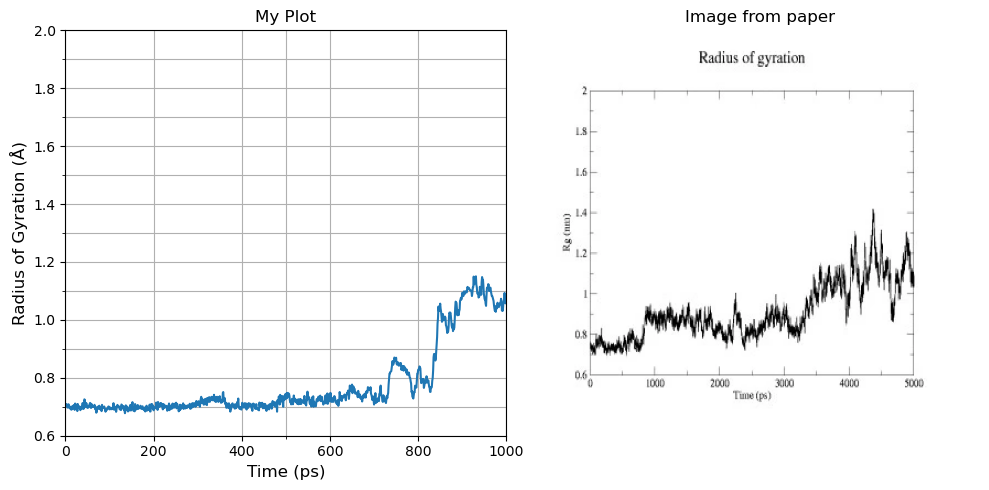

In [ ]:
# Load your image
image_path = '/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/plots_for_paper/12976_2004_Article_20_Fig2_HTML.webp'
image = Image.open(image_path).convert('RGB')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.plot(np.array(rg_list_heat[:1000])/10)
ax1.set_title('My Plot')
ax1.set_xlabel('Time (ps)')
ax1.set_ylabel('Radius of Gyration (Å)')
ax1.set_ylim(top = 2, bottom = 0.6)
ax1.set_xlim(right = 1000, left = 0)
ax1.xaxis.set_minor_locator(MultipleLocator(500))
ax1.yaxis.set_minor_locator(MultipleLocator(0.1))

ax2.imshow(image, aspect='auto')
ax2.axis('off')  
ax2.set_title('Image from paper')

ax1.grid(which = 'both')
plt.tight_layout()
plt.show()

In [144]:
view(vacuum_498_traj[-1], viewer = 'x3d')

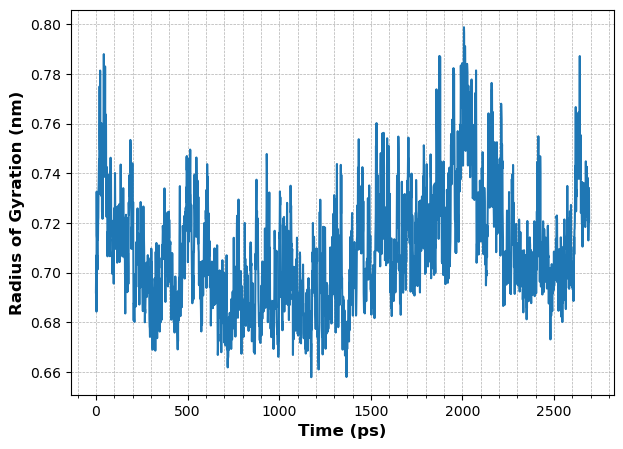

In [ ]:

fig, ax = plt.subplots(figsize=(7,5))

plt.plot(np.array(rg_list_heat[:4000])/10)

plt.xlabel("Time (ps)", fontweight='bold')
plt.ylabel("Radius of Gyration (nm)", fontweight='bold')
ax.xaxis.set_minor_locator(MultipleLocator(100))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
# plt.ylim(top = 1.4, bottom = 0.6)
plt.grid(True, which = 'both', linestyle="--", linewidth=0.5)
# ax.set_yticks([0.6,0.8,1.0,1.2,1.4])

#plt.savefig('/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/plots_for_paper/regular_first_1ns_unfolding.png', dpi=300, bbox_inches='tight')

plt.show()


In [ ]:
view(vacuum_498_traj[-1], viewer='x3d')

## Solvated

In [ ]:
initial_traj = read("/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/analysis_scripts/trajectory_files/solvent_full_trajectory_300K.traj", index = ":")

: 

In [6]:
initial_traj[0]

Atoms(symbols='C54H1609Ca20Cd13Ce5He9Hg18N23Ne3O780', pbc=True, cell=[33.698, 33.698, 33.698], momenta=..., calculator=SinglePointCalculator(...))

In [ ]:
pdb_atoms = read("/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/setup_scripts/explicit_solvent/solvated_750_water_molecules_2jof_trp_cage.pdb")

In [44]:
pdb_atoms.set_cell([31.5, 31.5, 31.5])  

In [45]:
pdb_atoms.center()

In [ ]:
view = nv.show_ase(pdb_atoms)
view.add_representation("cartoon", selection="protein and sidechain")

view.add_representation("ball+stick", selection="water", opacity=0.2, color="blue")

view.add_unitcell()  

view

NGLWidget()

In [5]:
len(initial_traj)

1031

In [7]:
view(initial_traj[-1], viewer = 'x3d')

In [ ]:
write("/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/analysis_scripts/trajectory_files/solvent_full_trajectory_300K.pdb", initial_traj)

In [ ]:
initial_traj_universe = mda.Universe("/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/setup_scripts/explicit_solvent/trp_cage/final_solvated_750_water_molecules_2jof_trp_cage.pdb", "/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/analysis_scripts/trajectory_files/solvent_full_trajectory_300K.pdb")

In [ ]:
initial_traj_universe.trajectory

In [ ]:
initial_traj_498k = read("/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/analysis_scripts/trajectory_files/solvent_full_trajectory_498K.traj", index = ":")

In [8]:
len(initial_traj_498k)


745

In [18]:
initial_traj_498k[0]

Atoms(symbols='C54H1609Ca20Cd13Ce5He9Hg18N23Ne3O780', pbc=True, cell=[33.698, 33.698, 33.698], momenta=..., calculator=SinglePointCalculator(...))

In [19]:
len(initial_traj_498k)

636

In [ ]:
view(initial_traj_498k[-1], viewer = 'x3d')

In [ ]:
write("/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/analysis_scripts/trajectory_files/solvent_full_trajectory_498K.pdb", initial_traj_498k)

In [115]:
# Load universe
# Select everything except water
only_protein = initial_traj_universe.select_atoms('not resname HOH')

positions = only_protein.atoms.positions
only_protein_view = nv.show_mdanalysis(only_protein)
only_protein_view.add_representation("ball+stick", selection="not protein")
only_protein_view

NGLWidget(max_frame=551)

In [165]:
protein = initial_traj_universe.select_atoms('not resname HOH')
protein

<AtomGroup with 284 atoms>

In [12]:
protein = initial_traj_universe.select_atoms('not resname HOH')

radii_gyration_list_300k = []

for ts in initial_traj_universe.trajectory:
    
    #Ensure to wrap with pbcs
    protein.wrap()
    
    rad = protein.radius_of_gyration()
    radii_gyration_list_300k.append(rad)

In [ ]:
traj_heating_universe = mda.Universe("/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/setup_scripts/explicit_solvent/trp_cage/final_solvated_750_water_molecules_2jof_trp_cage.pdb", "/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/analysis_scripts/trajectory_files/solvent_full_trajectory_498K.pdb")

In [ ]:
traj_heating_universe.trajectory

In [13]:
protein = traj_heating_universe.select_atoms('not resname HOH')

radii_gyration_list_heating = []

for ts in traj_heating_universe.trajectory:
    
    #Ensure to wrap with pbcs
    protein.wrap()
    
    rad = protein.radius_of_gyration()
    radii_gyration_list_heating.append(rad)

- Plot

### Add images of solvated system to the plot??

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

plt.plot(np.array(radii_gyration_list_heating)/10, linestyle = '--')
plt.plot(np.array(radii_gyration_list_300k)[:-32]/10)

plt.xlabel("Time (ps)", fontweight='bold')
plt.ylabel("Radius of Gyration (nm)", fontweight='bold')
ax.xaxis.set_minor_locator(MultipleLocator(100))
ax.yaxis.set_minor_locator(MultipleLocator(0.025))
plt.grid(which = 'both', linestyle="--", linewidth=0.5)
plt.legend(labels=['498 K', '300 K'])
# ax.set_xticks([0,100,200,300,400,500,600])
ax.set_yticks([0.8,0.9,1.0,1.1,1.2,1.3])

plt.savefig('/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/plots_for_paper/radius_gyration_solvated_regular_trp_cage_300K_and_498k.png', dpi=300, bbox_inches='tight')

plt.show()

- Analysis of the trajectory file

In [231]:
protein = initial_traj_universe.select_atoms('not resname HOH')

i = 0 

for ts in initial_traj_universe.trajectory:

    protein.wrap()
    
    if i ==0:
        starting_protein_positions = protein.positions
        
        print(starting_protein_positions[:,0].min())
        print(starting_protein_positions[:,0].max())
        print(abs(starting_protein_positions[:,0].min()-starting_protein_positions[:,0].max()))
        print('\n')

        print(starting_protein_positions[:,1].min())
        print(starting_protein_positions[:,1].max())
        print(abs(starting_protein_positions[:,1].min()-starting_protein_positions[:,1].max()))
        print('\n')

        print(starting_protein_positions[:,2].min())
        print(starting_protein_positions[:,2].max())
        print(abs(starting_protein_positions[:,2].min()-starting_protein_positions[:,2].max()))
        print('\n')
        
    elif i==551:
        final_step_protein_positions = protein.positions
        
        print(final_step_protein_positions[:,0].min())
        print(final_step_protein_positions[:,0].max())
        print(abs(final_step_protein_positions[:,0].min()-final_step_protein_positions[:,0].max()))
        print('\n')


        print(final_step_protein_positions[:,1].min())
        print(final_step_protein_positions[:,1].max())
        print(abs(final_step_protein_positions[:,1].min()-final_step_protein_positions[:,1].max()))
        print('\n')

        print(final_step_protein_positions[:,2].min())
        print(final_step_protein_positions[:,2].max())
        print(abs(final_step_protein_positions[:,2].min()-final_step_protein_positions[:,2].max()))
        
        
    i+=1

2.6369972
29.997
27.360003


0.24599838
31.632
31.386002


6.653
28.23
21.577


2.3110046
32.458
30.146996


0.568985
30.322
29.753016


5.948
31.136997
25.188997


- Increased in the x and z directions?

In [ ]:
view_axes = nv.show_mdanalysis(initial_traj_universe)
view_axes.add_representation("axes", {"xColor": "red", "yColor": "green", "zColor": "blue"})
view_axes

NGLWidget(max_frame=551)

In [ ]:
view(initial_traj[-1])

## Load in protein structures from PDB

- Contains heteroatoms (water, ligands etc), do we keep these?

In [ ]:
# Load the PDB structure, this is the 'Fip mutant' human Pin1 protein
trp_cage = read('/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/setup_scripts/explicit_solvent/trp_cage/2jof_trp_cage_last_conform.pdb', index = 0)


# Human Pin1 Ng mutant
trp_cage_retro = read('/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/setup_scripts/explicit_solvent/trp_cage/2luf_trp_cage_retro_last_conform.pdb', index = 0)

In [3]:
len(trp_cage)

284

In [4]:
len(trp_cage_retro)

304

- Set ASE calculator

In [ ]:
trp_cage.calc = macemp


- System Properties

In [ ]:
trp_cage.get_center_of_mass()

array([-1.39261201, 14.98862588, 42.07581415])

In [ ]:
view(trp_cage, viewer='x3d')

In [ ]:
trp_cage

Atoms(symbols='C763N223O411S6', pbc=True, cell=[49.012, 49.012, 135.278], atomtypes=..., bfactor=..., occupancy=..., residuenames=..., residuenumbers=...)

- Comparison to standard structure, how about unfolded structure?

In [ ]:
# This is the standard Pin1 structure...
trp_cage_protein_standard = read("", index = 0)

## Radius of Gyration

In [ ]:
trp_cage.get_center_of_mass()

array([-1.39261201, 14.98862588, 42.07581415])

In [64]:
experimental_rg = radius_of_gyration(trp_cage)

In [11]:
experimental_rg

7.239881786377119

- Comparison to retro system

In [8]:
radius_of_gyration(trp_cage_retro)

7.287876930382901

- Unfolded structure generated...

In [ ]:
unfolded = read("")

radius_of_gyration(unfolded)

19.334335338114016

## Root Mean Squared Deviation - Deviation in Structure

In [5]:
def calculate_rmsd(atoms, initial_structure):
    
    # Align the atoms with the initial structure (in terms of translation and rotation that have ocured since the start of the simulation)
    minimize_rotation_and_translation(initial_structure, atoms)
    
    # Calculate the RMSD
    diff = atoms.positions - initial_structure.positions
    rmsd = np.sqrt(np.sum(diff**2) / len(atoms))
    
    return rmsd

## Trajectory: 300K

- Removing water to calculate the radius of gyration...

In [ ]:
traj = read("/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/analysis_scripts/production_1_simulation_300K_trp_cage_standard (4).traj", index  = ":")

In [68]:
len(traj)

869

- Video of trajectory

In [ ]:
nv.show_asetraj(traj)

NGLWidget(max_frame=27)

- Image of final structure

In [ ]:
view(traj[-1], viewer = 'x3d')

- Write out to a pdb file so we can remove waters via mdanalysis

In [ ]:
write("/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/analysis_scripts/after_npt_pdb_production_1_simulation_300K_trp_cage_standard.pdb", traj)

In [ ]:
aqueous_protein_universe = mda.Universe("/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/setup_scripts/explicit_solvent/trp_cage/final_solvated_750_water_molecules_2jof_trp_cage.pdb", "/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/analysis_scripts/pdb_production_1_simulation_300K_trp_cage_standard.pdb")

In [ ]:
len(aqueous_protein_universe.trajectory)

72

In [84]:
# Load universe
# Select everything except water
only_protein = other_aqueous_protein_universe.select_atoms('not resname HOH')

positions = only_protein.atoms.positions

In [86]:
combined_view = nv.show_mdanalysis(only_protein)
combined_view.add_representation("ball+stick", selection="not protein")
combined_view

NGLWidget(max_frame=27)

In [29]:
combined_view = nv.show_mdanalysis(aqueous_protein_universe)
combined_view.add_representation("ball+stick", selection="not protein")
combined_view

NGLWidget(max_frame=821)

- Access different properties of system

In [ ]:
traj[-1].get_temperature()

301.519933424189

In [ ]:
traj[-1][:284]

Atoms(symbols='C54H109Ca20Cd13Ce5He9Hg18N23Ne3O30', pbc=True, cell=[34.0, 34.0, 34.0], momenta=...)

- Re - centre box

In [ ]:
re_centred = []

i=0
for atoms in md_steps_traj:
    md_steps_traj[i].set_positions(md_steps_traj[i].get_positions() + 16)
    re_centred.append(atoms)
    i+=1

In [ ]:
# Load ASE trajectory
traj = re_centred
for atoms in traj:
    
    atoms.wrap(eps=0.01)  # Wrap to simulation box


NGLWidget(max_frame=119)

In [ ]:

# View wrapped trajectory
view = nv.show_asetraj(traj)  # Show every 10 frames
view.add_representation('licorice')
view

In [21]:
md_steps_traj[-1]

Atoms(symbols='C54H1204Ca20Cd13Ce5He6Hg18N23Ne3O576', pbc=True, cell=[32.0, 32.0, 32.0], momenta=..., calculator=SinglePointCalculator(...))

- Removing water

## Radius of Gyration and RMSD over simulation (Then at different temperatures...)

In [30]:
len(aqueous_protein_universe.trajectory)

869

In [83]:
protein = other_aqueous_protein_universe.select_atoms('not resname HOH')

radii_gyration_list = []

for ts in other_aqueous_protein_universe.trajectory:
    rad = protein.radius_of_gyration()
    radii_gyration_list.append(rad)
    print('frame={}: radgyr={}'.format(ts.frame, rad))

frame=0: radgyr=8.4681941410242
frame=1: radgyr=8.492017438626629
frame=2: radgyr=8.452922352254042
frame=3: radgyr=8.449727359170714
frame=4: radgyr=8.49977373798257
frame=5: radgyr=8.512199917843033
frame=6: radgyr=8.501082512299275
frame=7: radgyr=8.493750041790248
frame=8: radgyr=8.483258905228373
frame=9: radgyr=8.483855896166316
frame=10: radgyr=8.55016631376646
frame=11: radgyr=8.464187567286782
frame=12: radgyr=8.570002230715172
frame=13: radgyr=8.552473622607963
frame=14: radgyr=8.496497890849328
frame=15: radgyr=8.448647997442972
frame=16: radgyr=8.465829432625293
frame=17: radgyr=8.487923280068147
frame=18: radgyr=8.561212656895696
frame=19: radgyr=8.576256625711416
frame=20: radgyr=8.56897242284541
frame=21: radgyr=8.606243658060098
frame=22: radgyr=8.586159318838149
frame=23: radgyr=8.629086122463011
frame=24: radgyr=8.658746947333643
frame=25: radgyr=8.683978556341886
frame=26: radgyr=8.7237315800336
frame=27: radgyr=8.759620350758635


In [60]:
protein = aqueous_protein_universe.select_atoms('not resname HOH')

radii_gyration_list = []

for ts in aqueous_protein_universe.trajectory:
    rad = protein.radius_of_gyration()
    radii_gyration_list.append(rad)
    print('frame={}: radgyr={}'.format(ts.frame, rad))

frame=0: radgyr=8.159944301651224
frame=1: radgyr=8.158879504857424
frame=2: radgyr=8.159202043959239
frame=3: radgyr=8.159201971112285
frame=4: radgyr=8.159290342834298
frame=5: radgyr=8.158173950890253
frame=6: radgyr=8.155706482948085
frame=7: radgyr=8.152278477716003
frame=8: radgyr=8.149719382964534
frame=9: radgyr=8.14854285624331
frame=10: radgyr=8.147818829555645
frame=11: radgyr=8.147873721403943
frame=12: radgyr=8.147966620779398
frame=13: radgyr=8.14848800743523
frame=14: radgyr=8.14946320367836
frame=15: radgyr=8.150760288344195
frame=16: radgyr=8.151799089456691
frame=17: radgyr=8.152807592155263
frame=18: radgyr=8.153581245865693
frame=19: radgyr=8.154746664402015
frame=20: radgyr=8.156781575571783
frame=21: radgyr=8.158627348197232
frame=22: radgyr=8.159484513762589
frame=23: radgyr=8.160471509579475
frame=24: radgyr=8.161487135732765
frame=25: radgyr=8.163672223778004
frame=26: radgyr=8.166352919492006
frame=27: radgyr=8.170191382207966
frame=28: radgyr=8.17385051811071

In [12]:
experimental_rg

7.239881786377119

In [32]:
len(radii_gyration_list)

869

In [56]:
rmsd_list

[np.float64(4.3258474095055165e-17),
 np.float64(0.722282227998294),
 np.float64(1.0851660390729507),
 np.float64(1.2812609833691906),
 np.float64(1.3926946227982249),
 np.float64(1.4685215163281342),
 np.float64(1.527176457294138),
 np.float64(1.5792359384849337),
 np.float64(1.6228613253374782),
 np.float64(1.6750544809735741),
 np.float64(1.708400751139312),
 np.float64(1.7601993131975529),
 np.float64(1.8102502081440073),
 np.float64(1.8524642744515294),
 np.float64(1.8907520912631606),
 np.float64(1.9222944723257547),
 np.float64(1.9539021404998402),
 np.float64(1.9868233345490842),
 np.float64(2.035472906298457),
 np.float64(2.0716194363172438),
 np.float64(2.095797257423611),
 np.float64(2.1303474524296004),
 np.float64(2.156186665569622),
 np.float64(2.181953995628308),
 np.float64(2.197587911670665),
 np.float64(2.2075860551889193),
 np.float64(2.231426317571567),
 np.float64(2.2433372804613083),
 np.float64(2.2624107839994614),
 np.float64(2.284799711216811),
 np.float64(2.30

In [31]:
len(radii_gyration_list) -60

762

## Showing dynamics are realistic...

In [61]:
#Indexing needed for first run.. can do same for RMSE

formatted_radius_list = [radii_gyration_list[0]] + [radii_gyration_list[99]] + [radii_gyration_list[201]] + [radii_gyration_list[215]] + radii_gyration_list[225:765:10] + radii_gyration_list[762:]
len(formatted_radius_list)

165

In [93]:
plt.rcParams.update({
    #'axes.titleweight': 'bold',        
    'axes.titlesize': 16,              
    'axes.labelsize': 14,              
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,             
    'legend.fontsize': 16,            
    'figure.titlesize': 16,            
})

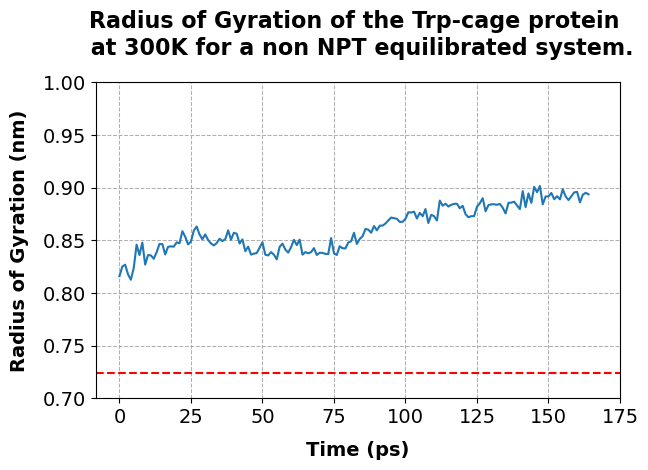

In [ ]:
plt.plot(np.array(formatted_radius_list)/10)
plt.axhline(y=experimental_rg/10, color='r', linestyle='--')
#plt.axvline(x=762, color='b', linestyle='-')

plt.xlabel('Time (ps)', fontweight = "bold", labelpad = 10) # Convert to time in nanoseconds or picoseconds?
plt.ylabel('Radius of Gyration (nm)', fontweight = "bold", labelpad = 10)
plt.title('Radius of Gyration of the Trp-cage protein \n at 300K for a non NPT equilibrated system.', loc = "center", pad = 20, fontweight = "bold")


plt.ylim(bottom = 0.7, top = 1)

# So text isn't cut of

plt.tight_layout()

plt.grid(True, which='both', linestyle="--", linewidth=0.75)

plt.xlim(right = 175)

#Saving Image

plt.savefig('/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/plots_for_paper/supplementary_figure_1.png')

plt.show()

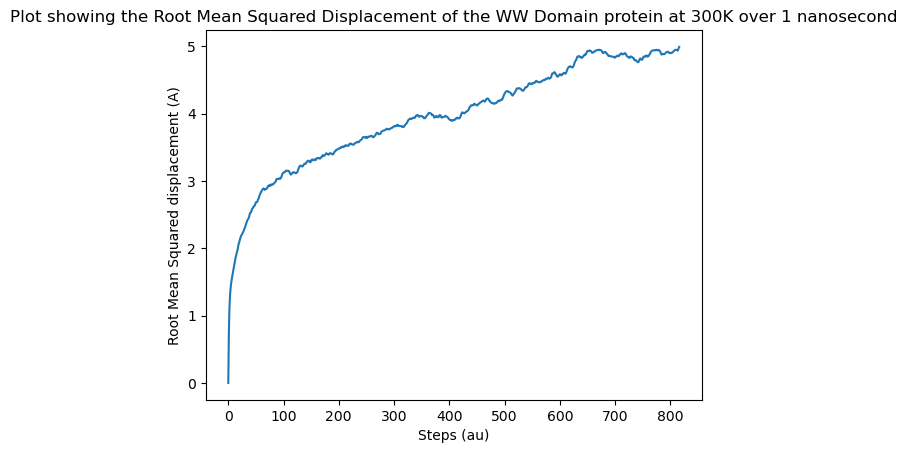

In [ ]:
lt.plot(rmsd_list)

plt.xlabel('Steps (au)') # Convert to time in nanoseconds or picoseconds?
plt.ylabel('Root Mean Squared displacement (A)')

plt.title('Plot showing the Root Mean Squared Displacement of the WW Domain protein at 300K over 1 nanosecond')

plt.show()


In [39]:
traj[-1]

Atoms(symbols='C54H1609Ca20Cd13Ce5He9Hg18N23Ne3O780', pbc=True, cell=[34.0, 34.0, 34.0], momenta=..., calculator=SinglePointCalculator(...))

In [48]:
traj[-1].get_positions()

array([[-1.53891353,  8.34930151, -2.84008391],
       [-3.15259818,  8.63089887, -4.61080225],
       [-5.86849403,  2.20900958, -1.72363575],
       ...,
       [ 1.85176202, 15.19273392,  1.14513835],
       [ 1.18887144, 15.08022021,  0.49719501],
       [ 1.71676418, 14.80699444,  2.04003234]])

## Heat until melt

    - Which temperatures do we want to simulate at? Start at 300K and increase in 5-10K increments...

    - How many steps in between each increment?


**Compared with the experimentally determined melting temperature of 371 ± 2 K for the WW domain, the estimation of Tm provided by AI2BMD was closer (359.06 ± 0.07 K) than that of MM (353.69 ± 0.38 K).**

## Visualize trajectory at 498K

In [ ]:
initial_traj_498 = read("/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/analysis_scripts/trajectory_files/nvt_prod_1_simulation_498K_trp_cage_standard.traj", index = ":")

In [60]:
len(initial_traj_498)

NameError: name 'initial_traj_498' is not defined

In [ ]:
write

In [19]:
view(initial_traj_498[-1], viewer = 'x3d')

In [ ]:
write("/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/analysis_scripts/trajectory_files/nvt_498k_run.pdb", initial_traj_498)

In [ ]:
initial_traj_498_universe = mda.Universe("/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/setup_scripts/explicit_solvent/trp_cage/final_solvated_750_water_molecules_2jof_trp_cage.pdb", "/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/analysis_scripts/trajectory_files/nvt_498k_run.pdb")

In [17]:
# Load universe
# Select everything except water
only_protein = initial_traj_498_universe.select_atoms('not resname HOH')

positions = only_protein.atoms.positions
only_protein_view = nv.show_mdanalysis(only_protein)
only_protein_view.add_representation("ball+stick", selection="not protein")
only_protein_view

NGLWidget(max_frame=355)

In [190]:
protein = initial_traj_498_universe.select_atoms('not resname HOH')

radii_gyration_list = []

for ts in initial_traj_498_universe.trajectory:
    protein.wrap()
    rad = protein.radius_of_gyration()
    radii_gyration_list.append(rad)
    print('frame={}: radgyr={}'.format(ts.frame, rad))

frame=0: radgyr=8.646594233313685
frame=1: radgyr=8.646594233313685
frame=2: radgyr=8.776180223152293
frame=3: radgyr=8.74673499659961
frame=4: radgyr=8.976366855183887
frame=5: radgyr=9.07621733983134
frame=6: radgyr=9.04855375477059
frame=7: radgyr=9.126413714156437
frame=8: radgyr=9.065167503625936
frame=9: radgyr=9.07529513471239
frame=10: radgyr=9.047829336130643
frame=11: radgyr=9.377841115318033
frame=12: radgyr=9.363822581361788
frame=13: radgyr=9.483404456185749
frame=14: radgyr=9.626057316393954
frame=15: radgyr=9.727548667777468
frame=16: radgyr=9.556927216631864
frame=17: radgyr=9.450796791657698
frame=18: radgyr=9.40697781276519
frame=19: radgyr=9.46087583155028
frame=20: radgyr=9.746653306601623
frame=21: radgyr=9.737707368025026
frame=22: radgyr=9.911564031986234
frame=23: radgyr=10.027219666978667
frame=24: radgyr=10.060234886692971
frame=25: radgyr=10.208879277501136
frame=26: radgyr=10.070867285713158
frame=27: radgyr=10.010995538766915
frame=28: radgyr=10.00537307848

<>:6: SyntaxWarning: invalid escape sequence '\m'
<>:6: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_34301/4014756048.py:6: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('Radius of Gyration $(\mathring{A})$', fontsize=14)


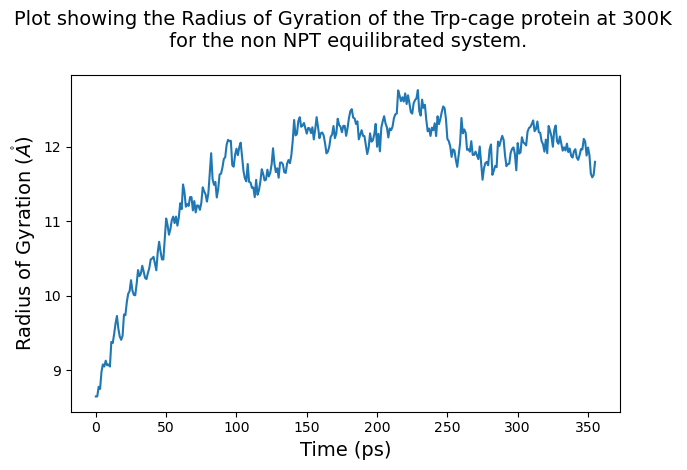

In [ ]:
plt.plot(radii_gyration_list)
#plt.axhline(y=experimental_rg, color='r', linestyle='--')
#plt.axvline(x=762, color='b', linestyle='-')

plt.xlabel('Time (ps)', fontsize=14) # Convert to time in nanoseconds or picoseconds?
plt.ylabel('Radius of Gyration $(\mathring{A})$', fontsize=14)
plt.title('Plot showing the Radius of Gyration of the Trp-cage protein at 300K \n for the non NPT equilibrated system.', loc = "center", pad = 20, fontsize=14)

#plt.ylim(bottom = 0, top = 35)

# So text isn't cut of

plt.tight_layout()

#Saving Image

#plt.savefig('/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/plots_for_paper/supplementary_figure_1.png')

plt.show()